<font color=red><p style="font-size:32px;text-align:center"><b>FB Models</b></p></font>

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns

import pickle
import networkx as nx
import math
import os

from pandas import HDFStore,DataFrame
from pandas import read_hdf
from tqdm import tqdm

In [ ]:
#references:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
#https://github.com/krpiyush5/Facebook-Friend-Recommendation-using-Graph-Mining
#https://xgboost.readthedocs.io/en/latest/python/python_api.html

<font color=blue><h3>Reading Data</h3></font>

In [3]:
train_data_final = read_hdf('storage_sample_stage5.h5', 'train_df', mode='r')
test_data_final = read_hdf('storage_sample_stage5.h5', 'test_df', mode='r')

In [4]:
train_data_final.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'prefer_attach_followers', 'prefer_attach_followees', 'svd_dot'],
      dtype='object')

In [5]:
y_train = train_data_final.indicator_link
y_test = test_data_final.indicator_link

In [6]:
train_data_final.drop(['source_node','destination_node','indicator_link'], axis=1, inplace=True)
test_data_final.drop(['source_node','destination_node','indicator_link'], axis=1, inplace=True)

<h3><font color=blue>Random Forest Classifier</font></h3>

Estimators = 10 Train Score 0.9167519261687511 and Test Score 0.8934560370661623
Estimators = 50 Train Score 0.9192633966067528 and Test Score 0.9137822265214283
Estimators = 100 Train Score 0.9204099868593956 and Test Score 0.9147175848929496
Estimators = 250 Train Score 0.9205737394161507 and Test Score 0.9118890580077794
Estimators = 450 Train Score 0.9216192574012204 and Test Score 0.9157663740715732


Text(0.5,1,'Estimators vs Score (At Depth = 5)')

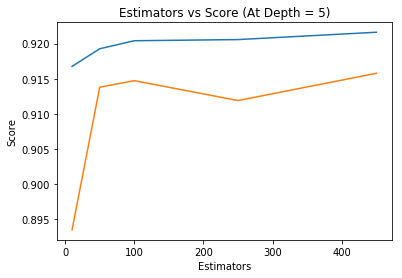

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
#max_depth = 5

for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    
    clf.fit(train_data_final, y_train)
    
    train_sc = f1_score(y_train, clf.predict(train_data_final))
    test_sc = f1_score(y_test, clf.predict(test_data_final))
    
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    
    print('Estimators =',i,'Train Score',train_sc,'and Test Score',test_sc)
    
plt.plot(estimators, train_scores, label='Train Score')
plt.plot(estimators, test_scores, label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs Score (At Depth = 5)')

Depth = 3 Train Score 0.9026329482776563 and Test Score 0.880138797791084
Depth = 9 Train Score 0.9578892189411148 and Test Score 0.9136544900091698
Depth = 11 Train Score 0.9623641039828676 and Test Score 0.9209209633649932
Depth = 15 Train Score 0.9640632683166694 and Test Score 0.9217092421284903
Depth = 20 Train Score 0.9645094802038576 and Test Score 0.9197192086790045
Depth = 35 Train Score 0.9647642578145023 and Test Score 0.9202764486975012
Depth = 50 Train Score 0.9647642578145023 and Test Score 0.9202764486975012
Depth = 70 Train Score 0.9647642578145023 and Test Score 0.9202764486975012
Depth = 130 Train Score 0.9647642578145023 and Test Score 0.9202764486975012


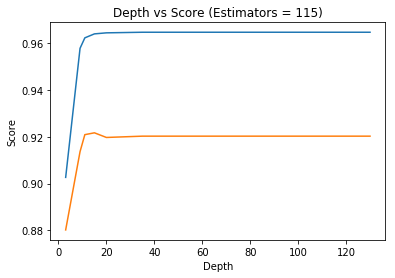

In [8]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
#n_estimators = 115

for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    
    clf.fit(train_data_final, y_train)
    
    train_sc = f1_score(y_train, clf.predict(train_data_final))
    test_sc = f1_score(y_test, clf.predict(test_data_final))
    
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    
    print('Depth =',i,'Train Score',train_sc,'and Test Score',test_sc)
    
plt.plot(depths, train_scores, label='Train Score')
plt.plot(depths, test_scores, label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs Score (Estimators = 115)')
plt.show()

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=5, cv=10, scoring='f1', random_state=25, return_train_score=True)

rf_random.fit(train_data_final, y_train)

print('Mean Test Scores', rf_random.cv_results_['mean_test_score'])
print('Mean Train Scores', rf_random.cv_results_['mean_train_score'])

Mean Test Scores [0.96245171 0.96234821 0.9609799  0.96264295 0.96371073]
Mean Train Scores [0.96378433 0.96344898 0.96193646 0.96363712 0.96511644]


In [10]:
print("Best Score: ",rf_random.best_score_)
print("Best Depth: ",rf_random.best_params_['max_depth'])
print("Best n_Estimators: ",rf_random.best_params_['n_estimators'])

Best Score:  0.963710726186731
Best Depth:  14
Best n_Estimators:  121


In [11]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [12]:
clf = RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                             n_estimators=121, n_jobs=-1, random_state=25)

In [13]:
clf.fit(train_data_final, y_train)

y_train_pred = clf.predict(train_data_final)
y_test_pred = clf.predict(test_data_final)

In [14]:
rf_train_f1_sc = f1_score(y_train, y_train_pred)
rf_test_f1_sc = f1_score(y_test, y_test_pred)

print('Train f1 Score -',rf_train_f1_sc)
print('Test f1 Score -',rf_test_f1_sc)

Train f1 Score - 0.9648078518958682
Test f1 Score - 0.9171355498721228


In [15]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_y, predict_y):
    
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    
    plt.figure(figsize=(20,4))
    labels = [0,1]
    cmap=sns.light_palette("blue")
    
    #representing C in heatmap format
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion Matrix")
    
    #representing B in heatmap format
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision Matrix")
    
    #representing A in heatmap format
    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall Matrix")
    
    plt.show()

-------------------------------------------------- Train Confusion Matrix --------------------------------------------------


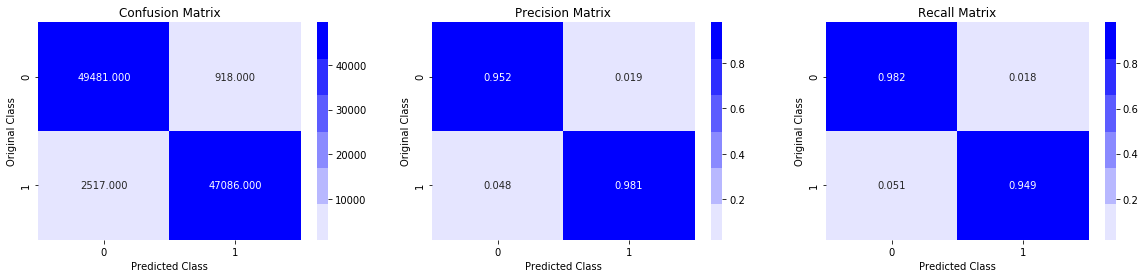

-------------------------------------------------- Test Confusion Matrix --------------------------------------------------


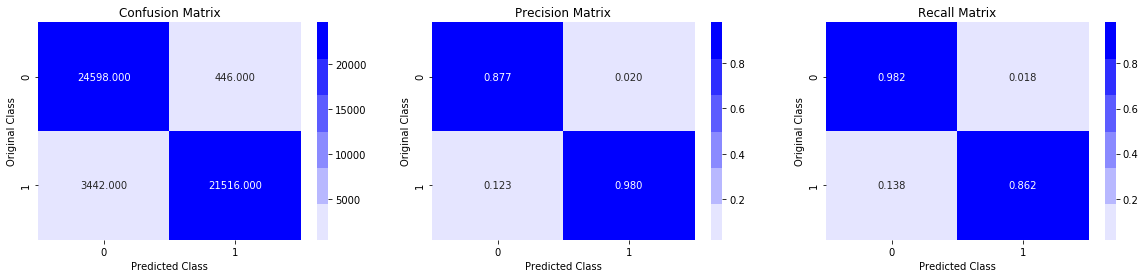

In [17]:
print('-'*50,'Train Confusion Matrix','-'*50)
plot_confusion_matrix(y_train, y_train_pred)

print('-'*50,'Test Confusion Matrix','-'*50)
plot_confusion_matrix(y_test, y_test_pred)

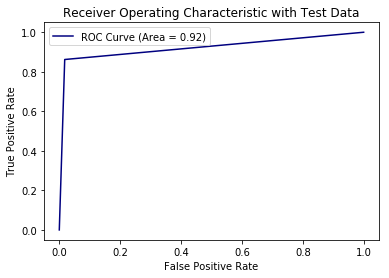

In [18]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, y_test_pred)
auc_sc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='navy', label='ROC Curve (Area = %0.2f)'% auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with Test Data')
plt.legend()
plt.show()

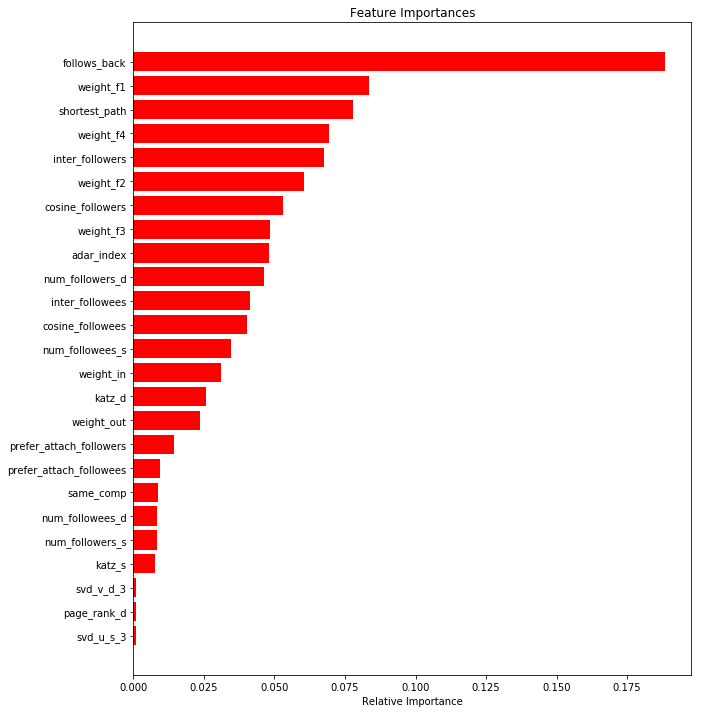

In [19]:
features = train_data_final.columns

importances = clf.feature_importances_

indices = (np.argsort(importances))[-25:]

plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h3><font color=blue>XG Boost</font></h3>

In [26]:
#ref: https://xgboost.readthedocs.io/en/latest/python/python_api.html
import xgboost as xgb

clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric="logloss")

param_distr = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15)
              }
xgbModel = RandomizedSearchCV(clf, param_distributions=param_distr, n_iter=5, cv=3, scoring='f1', random_state=25, return_train_score=True)

xgbModel.fit(train_data_final, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=na...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [27]:
print('Mean Test Scores', xgbModel.cv_results_['mean_test_score'])
print('Mean Train Scores', xgbModel.cv_results_['mean_train_score'])

Mean Test Scores [0.98110049 0.98118364 0.98156175 0.98152582 0.98152651]
Mean Train Scores [1. 1. 1. 1. 1.]


In [28]:
print("Best Score: ",xgbModel.best_score_)
print("Best Depth: ",xgbModel.best_params_['max_depth'])
print("Best n_Estimators: ",xgbModel.best_params_['n_estimators'])

Best Score:  0.9815617458164603
Best Depth:  10
Best n_Estimators:  109


In [29]:
print(xgbModel.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=109, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [35]:
#ref = https://stackoverflow.com/questions/42136276/how-to-use-missing-parameter-of-xgbregressor-of-scikit-learn

clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=np.nan,
              monotone_constraints='()', n_estimators=109, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
clf.fit(train_data_final, y_train)

y_train_pred = clf.predict(train_data_final)
y_test_pred = clf.predict(test_data_final)

In [37]:
xgb_train_f1_sc = f1_score(y_train, y_train_pred)
xgb_test_f1_sc = f1_score(y_test, y_test_pred)

print('Train f1 Score -',xgb_train_f1_sc)
print('Test f1 Score -',xgb_test_f1_sc)

Train f1 Score - 1.0
Test f1 Score - 0.9229391063239842


-------------------------------------------------- Train Confusion Matrix --------------------------------------------------


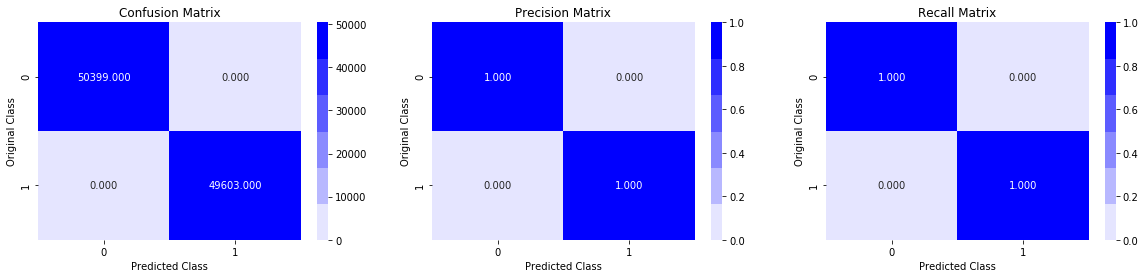

-------------------------------------------------- Test Confusion Matrix --------------------------------------------------


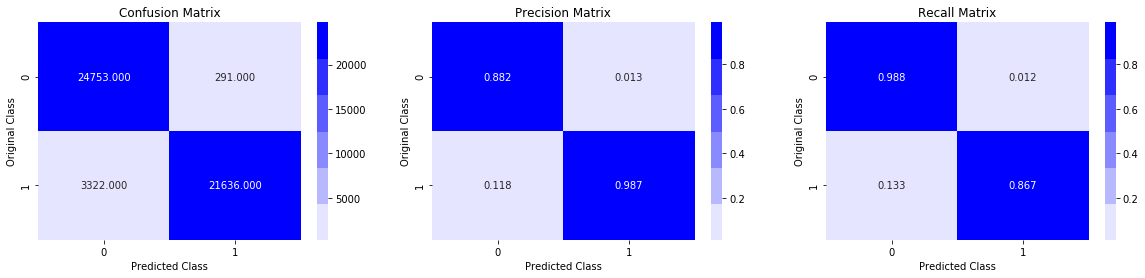

In [38]:
print('-'*50,'Train Confusion Matrix','-'*50)
plot_confusion_matrix(y_train, y_train_pred)

print('-'*50,'Test Confusion Matrix','-'*50)
plot_confusion_matrix(y_test, y_test_pred)

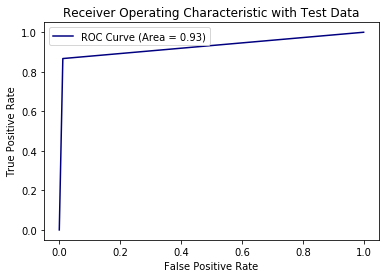

In [39]:
fpr, tpr, threshold = roc_curve(y_test, y_test_pred)
auc_sc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='navy', label='ROC Curve (Area = %0.2f)'% auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with Test Data')
plt.legend()
plt.show()

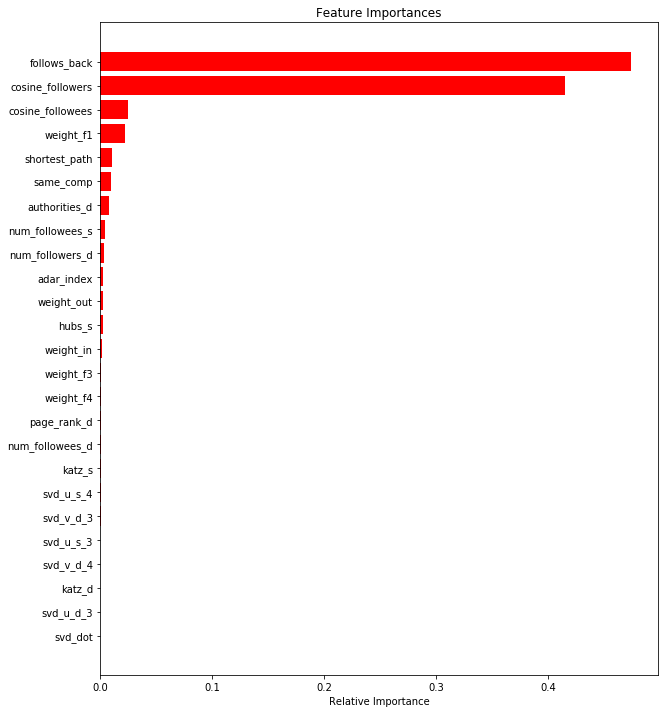

In [41]:
features = train_data_final.columns

importances = clf.feature_importances_

indices = (np.argsort(importances))[-25:]

plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h3><font color=blue>Observation and Summary</font></h3>

In [44]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Model", "n_estimators", "max_depth", "Train f1-Score","Test f1-Score"]
x.add_row(['Random Forest', rf_random.best_params_['n_estimators'], rf_random.best_params_['max_depth'], round(rf_train_f1_sc,2), round(rf_test_f1_sc,2)])
x.add_row(['XG Boost', xgbModel.best_params_['n_estimators'], xgbModel.best_params_['max_depth'], round(xgb_train_f1_sc,2), round(xgb_test_f1_sc,2)])
print(x)

+---------------+--------------+-----------+----------------+---------------+
|     Model     | n_estimators | max_depth | Train f1-Score | Test f1-Score |
+---------------+--------------+-----------+----------------+---------------+
| Random Forest |     121      |     14    |      0.96      |      0.92     |
|    XG Boost   |     109      |     10    |      1.0       |      0.92     |
+---------------+--------------+-----------+----------------+---------------+


- First of all, we performed exploratory data analysis on our given data set such as number of followers and number of followees of each person.

- Then we pose a problem as a Classification Problem and generated some edges (missing edges) which were not present in the graph, since we had only class label 1.

- After performing eploratory data analysis, we splitted whole dataset into train and test.

- Then we did some feature engineering on dataset; like Similarity Measures, Ranking Measures, Other Graph Features like Shortest Path, Following Back, Katz Centrality, Preferential Attachements etc. 

- After feature engineering, we performed random forest and xgboost taking f1-score as our metric.

- At last, we plotted confusion matrix and pretty-table for both algorithm.